## Assignment 4 : Linear Regression

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
df1 = pd.read_csv('delivery_time.csv')
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [37]:
df1.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [38]:
df1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x2785010db80>,
 'caps': [<matplotlib.lines.Line2D at 0x2785010d250>,
 'boxes': [<matplotlib.lines.Line2D at 0x2785010d820>],
 'medians': [<matplotlib.lines.Line2D at 0x2784fe83c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2784fe83430>],
 'means': []}

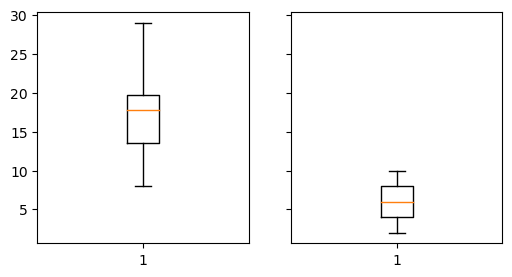

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
axs[0].boxplot(df1['Delivery Time'])
axs[1].boxplot(df1['Sorting Time'])

**The independent variable Delivery time is positively skewed. Therefore we need to transform the data**

{'whiskers': [<matplotlib.lines.Line2D at 0x278502444f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27850244a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x27850244220>],
 'medians': [<matplotlib.lines.Line2D at 0x27850261070>],
 'fliers': [<matplotlib.lines.Line2D at 0x27850261340>],
 'means': []}

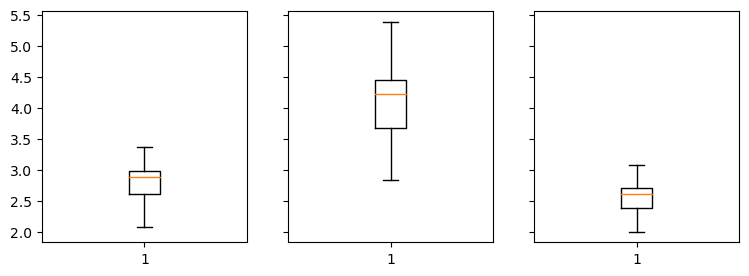

In [76]:
# comparing log and sqrt transformations
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].boxplot(np.log(df1['Delivery Time']))
axs[1].boxplot(np.sqrt(df1['Delivery Time']))
axs[2].boxplot(np.cbrt(df1['Delivery Time']))

In [77]:
df1['sqrt_trans'] = np.sqrt(df1['Delivery Time'])
df1['log_trans'] = np.log(df1['Delivery Time'])

In [78]:
df1.head()

,Delivery Time,Sorting Time,sqrt_trans,log_trans
0,21.00,10,4.582576,3.044522
1,13.50,4,3.674235,2.602690
2,19.75,6,4.444097,2.983153
3,24.00,9,4.898979,3.178054
4,29.00,10,5.385165,3.367296


<AxesSubplot:xlabel='log_trans', ylabel='Sorting Time'>

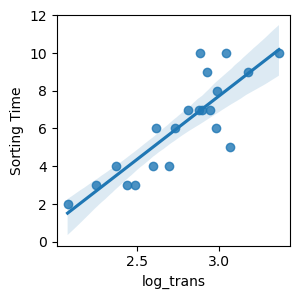

In [94]:
plt.figure(figsize = (3,3))
sns.regplot(x = df1['log_trans'], y = df1['Sorting Time'])

In [80]:
x  = np.array((df1['Delivery Time'])).reshape((-1, 1)) 
x1 = np.array((df1['log_trans'])).reshape((-1, 1))
x2 = np.array((df1['sqrt_trans'])).reshape((-1, 1)) 
y =np.array(df1['Sorting Time'])

In [96]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model1.fit(x, y)
model2.fit(x1, y)
model3.fit(x2, y)

LinearRegression()

In [97]:
print("R-square value (no transformation) =", model1.score(x, y))
print("R-square value (log_transformation) =", model2.score(x1, y))
print("R-square value (sqrt transformation) =", model3.score(x2, y))

R-square value (no transformation) = 0.6822714748417231
R-square value (log_transformation) = 0.7109478980584185
R-square value (sqrt transformation) = 0.704049871541756


**Log transformation of the Delivery time gave the highest R_square. Therefore we can choose model2**

In [103]:
y_hat = model2.predict(df1['log_trans'].values.reshape((-1,1)))
y_hat

array([ 8.0072956 ,  5.0313097 ,  7.59394209,  8.90670276, 10.18135141,
        5.89632782,  7.33317862,  2.66445223,  6.93148219,  7.24396475,
        7.62117021,  3.49706001,  6.4560177 ,  3.95131402,  4.25479422,
        5.68686948,  5.15490122,  7.01004265,  1.5069465 ,  6.90509042,
        8.1657864 ])

Text(0, 0.5, 'Residues')

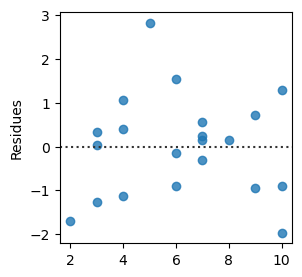

In [100]:
plt.figure(figsize = (3,3))
sns.residplot(x=y, y=y_hat)
plt.ylabel("Residues")

(array([1., 2., 3., 8., 4., 2., 1.]),
 array([-3.1657864 , -2.27517152, -1.38455663, -0.49394174,  0.39667315,
         1.28728804,  2.17790292,  3.06851781]),
 <BarContainer object of 7 artists>)

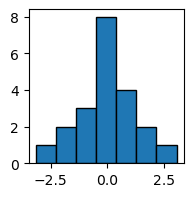

In [101]:
resid = y-y_hat
plt.figure(figsize = (2,2))
plt.hist(resid, bins = 7, edgecolor = 'black')

In [106]:
print(model2.intercept_)
print(model2.coef_)

-12.499232676555241
[6.73554841]


So our model for this probelm would be y = -12.5 + 6.74*(logx)

**Problem 2: Year of experience and Salary**

In [49]:
df2 = pd.read_csv("Salary_Data.csv")
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<Figure size 640x480 with 0 Axes>

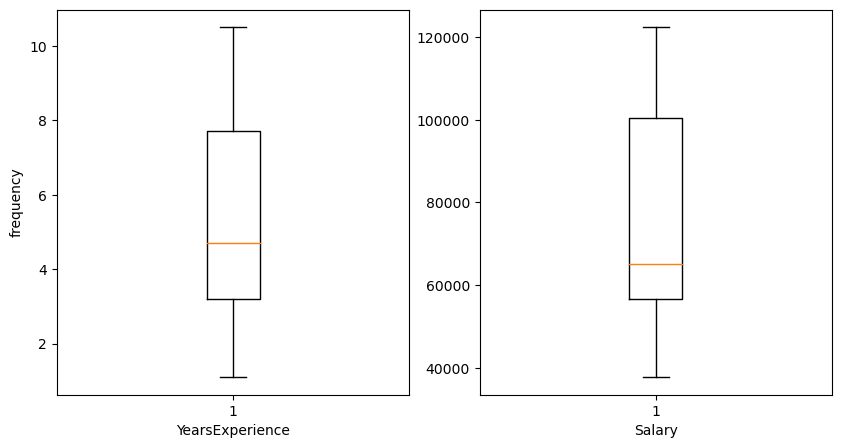

In [65]:
plt.subplots_adjust(wspace=0.8)
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].boxplot(x= df2['YearsExperience'], data = df2)
ax[0].set_xlabel('YearsExperience')
ax[0].set_ylabel('frequency')
ax[1].boxplot(x= df2['Salary'], data = df2)
ax[1].set_xlabel('Salary')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2785379a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2785379a670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2785378fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2785379ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2785379aee0>],
 'means': []}

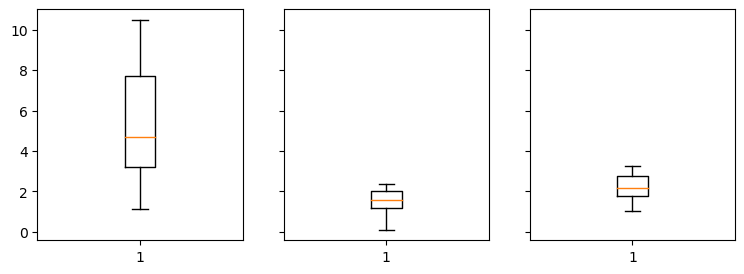

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].boxplot((df2['YearsExperience']))
axs[1].boxplot(np.log(df2['YearsExperience']))
axs[2].boxplot(np.sqrt(df2['YearsExperience']))

In [120]:
df2['log_trans'] = np.log(df2['YearsExperience'])
df2['sqrt_trans'] = np.sqrt(df2['YearsExperience'])
df2.head()

,YearsExperience,Salary,log_trans,sqrt_trans
0,1.1,39343.0,0.095310,1.048809
1,1.3,46205.0,0.262364,1.140175
2,1.5,37731.0,0.405465,1.224745
3,2.0,43525.0,0.693147,1.414214
4,2.2,39891.0,0.788457,1.483240


In [125]:
x  = np.array((df2['YearsExperience'])).reshape((-1, 1)) 
x1 = np.array((df2['log_trans'])).reshape((-1, 1))
x2 = np.array((df2['sqrt_trans'])).reshape((-1, 1)) 
y =np.array(np.sqrt(df2['Salary']))

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

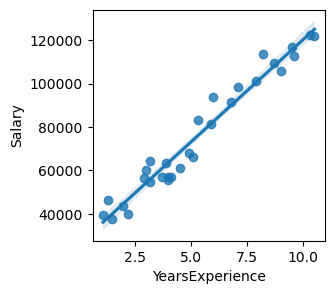

In [126]:
plt.figure(figsize = (3,3))
sns.regplot(x=df2['YearsExperience'], y = df2['Salary'])

In [127]:
model_a = LinearRegression()
model_b = LinearRegression()
model_c = LinearRegression()
model_a.fit(x,y)
model_b.fit(x1,y)
model_c.fit(x2,y)

print("R-square value (no transformation) =", model_a.score(x, y))
print("R-square value (log_transformation) =", model_b.score(x1, y))
print("R-square value (sqrt transformation) =", model_c.score(x2, y))

R-square value (no transformation) = 0.949835353386529
R-square value (log_transformation) = 0.8830727062597233
R-square value (sqrt transformation) = 0.9419490138976824


In [129]:
y_hat1 = model_c.predict(df2['sqrt_trans'].values.reshape((-1,1)))
y_hat1

array([182.88622598, 189.79599988, 196.19172763, 210.52066342,
       215.74089823, 232.35605495, 234.55771912, 238.85359917,
       238.85359917, 249.0393387 , 252.91925438, 254.82189445,
       254.82189445, 256.70089648, 263.99697981, 270.97538072,
       274.35768907, 277.67430277, 287.26520996, 288.81542461,
       300.77894118, 305.08223134, 316.13218413, 320.13060635,
       326.63543214, 330.44882634, 336.66588965, 337.88950886,
       346.28217966, 348.62729837])

Text(0, 0.5, 'Residues')

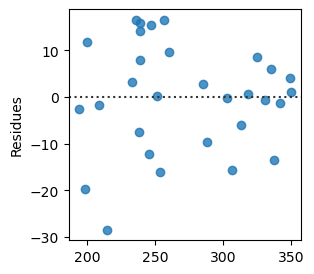

In [139]:
plt.figure(figsize = (3,3))
sns.residplot(x=y, y=y_hat1)
plt.ylabel("Residues")

(array([8., 7., 7., 5., 3.]),
 array([-18.61435858,  -9.85999017,  -1.10562176,   7.64874665,
         16.40311506,  25.15748346]),
 <BarContainer object of 5 artists>)

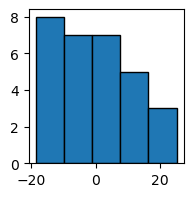

In [145]:
resid = y-y_hat1
plt.figure(figsize = (2,2))
plt.hist(resid, bins = 5, edgecolor = 'black')

In [147]:
print(model_c.intercept_)
print(model_c.coef_)

103.56803064869729
[75.6269319]


So our model for this probelm would be y = -12.5 + 6.74*(sqrtx)